# Seminarul 1
Sirul Fibonacci in Python
1. fib_1(n)
2. fib_2(n)
3. fib_r(n)
Secventa de numere in care fiecare numar este suma celor doua numere anterioare. Secventa incepe cu 0 si 1

In [62]:
import numpy as np # importam libraria numpy pt. vectori si matrici
import matplotlib.pyplot as grafic # importam libraria matplotlib pentru a reprezenta grafic
import time # importam libraria time pt. a vedea cat de rapid este codul

In [17]:
def fib_1(n):
    """
    calcularea primilor n (+1) termeni ai sirului Fibonacci intr-un vector
    :param n - indicele ultimului termen calculat
    :return vector - vectorul termenilor calculati
    """

    vector = np.zeros(n + 1, dtype=int) # se creeaza un vector de n+1 elemente, toate initializate cu 0
    vector[0], vector[1] = 0, 1 # initializam primele doua elemente cu 0 si 1 (definitia sirului Fibonacci)
    for i in range(2, n + 1): # pana la n+1 deoarece in functia range parametrul "stop" este exclusiv
        vector[i] = vector[i - 1] + vector[i - 2]
    return vector

fib_1(15) # exemplu apel

array([  0,   1,   1,   2,   3,   5,   8,  13,  21,  34,  55,  89, 144,
       233, 377, 610])

In [16]:
def fib_2(n):
    """
    calcularea primilor n (+1) termeni ai sirului Fibonacci intr-o lista
    :param n - indicele ultimului termen calculat
    :return vector - lista termenilor calculati
    """

    vector = [0, 1]
    for i in range(2, n + 1):
        vector += [ vector[i - 1] + vector[i - 2] ] # concatenam lista initiala cu o lista cu un singur element
    return vector

fib_2(15) # exemplu apel

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610]

In [15]:
def fib_r(n):
    """
    calcularea termenului n din sirul Fibonacci recursiv
    :param n - indicele termenului de calculat
    :return r - valoarea ultimului termen
    """
    if n == 0:
        r = 0 # daca indicele termenului este 0 si valoarea respectiva indicelui este 0
    elif n == 1:
        r = 1 # la fel si pentru indicele 1
    else:
        r = fib_r(n - 1) + fib_r(n - 2)
    return r

fib_r(15) # exemplu apel

610

Compararea performantei

In [63]:
%%timeit
fib_1(30)

3.74 μs ± 98.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [22]:
%%timeit
fib_2(30)

1.37 μs ± 36.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [21]:
%%timeit
fib_r(30)

97.8 ms ± 574 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Liste comprehensive

In [24]:
# progresie aritmetica a, b cu o ratie r
a, b, r = 10, 20, 2 # progresie aritmetica de la 10 pana la 20 cu ratia 2
progresie_aritmetica = [i for i in range(a, b + 1, r)] # pana la b + 1 pt. a il include si pe b
print(progresie_aritmetica)

[10, 12, 14, 16, 18, 20]


In [27]:
# elementele divizibile cu k dintr-o lista
lista_elemente = [i for i in range(1, 51)] # o lista cu elemente de la 1 la 50
k = 5
lista_elemente_div = [i for i in lista_elemente if i % k == 0] # punem i in lista daca rezultatul i mod k este egal cu 0
print(lista_elemente_div)

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]


In [28]:
# valoarea maxima dintr-o lista si pozitia (indexul) acesteia

lista_elemente_random = [0, 5, 15, -30, 22]
valoare_maxima = max(lista_elemente_random)
pozitie_valoare_maxima = lista_elemente_random.index(valoare_maxima) # indecsii incep de la 0
print(lista_elemente_random)
print(valoare_maxima)
print(pozitie_valoare_maxima)

[0, 5, 15, -30, 22]
22
4


In [38]:
# toate pozitiile unde apare un anumit element

lista_t = [1, 2, 3, 0, 1, 2, 4, 1, 5, 1, 6, 7]
toate_pozitile = [i for i, j in enumerate(lista_t) if j == 1] # enumerate ofera si indexul (i) cat si elementul (j) cand iteram
print(toate_pozitile)

[0, 4, 7, 9]


In [61]:
# diviziunea (impartirea unui interval in subintervale)

pas = 1
subinterval = [1 + i * pas for i in range(100) if 1 + i * pas <= 10]
print(subinterval)

# varianta normala
subinterval2 = np.arange(1, 10, 1)
print(subinterval2)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1 2 3 4 5 6 7 8 9]


Problema celor N regine

Solutia numarul 1 : [1, 3, 0, 2] 


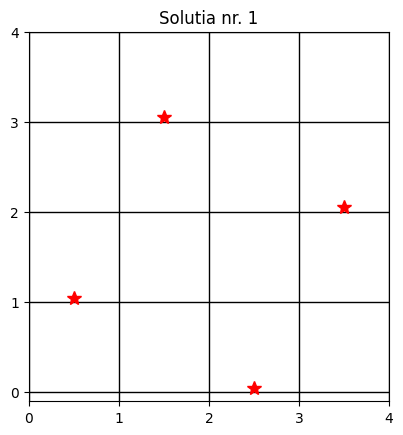

Solutia numarul 2 : [2, 0, 3, 1] 


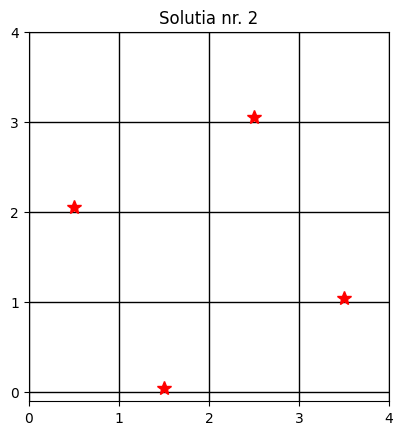

2

In [74]:
def regine(n):
    """
    metoda iterativa
    :param n - nr de regine si dimensiunea tablei de sah
    :return solutii_gasite - nr de solutii gasite
    """

    x = [0] * n # vector de lungine n
    solutii_gasite = 0 # contor pt. solutiile gasite
    i = 0 # indicele randului curent
    x[i] = -1 # setam prima pozitie pe o valoarea sub 0 pt. control

    while i > -1: # bucla principala a algoritmului; continuam cat timp nu am ajuns la o revenire finala
        gasit = False # presupunem  ca nu am gasit inca o solutie valida
        while x[i] < n - 1 and not gasit: # daca x[i] == n - 1 inseamna ca suntem pe ultima coloana
            x[i] = x[i] + 1
            gasit = posibil(x, i)
        if not gasit:
            i = i - 1 # revenim la randul anterior
        else:
            if i == n - 1: # daca i == n - 1 inseamna ca am plasat toate reginele
                solutii_gasite += 1 # crestem contorul
                retine_solutia(solutii_gasite, x)
            else:
                i = i + 1 # trecem la urmatorul rand
                x[i] = -1 # resetam pozitia pt. urmatoarea regina
    return solutii_gasite

def posibil(x, i):
    """
    verifica daca plasarea reginei pe coloana i este valida
    :param x - o lista cu solutia partiala
    :param i - indicele coloanei unde incarcam sa plasam o noua regina
    :return sol_valida - daca solutia gasita este valida
    """
    sol_valida = True # presupunem ca solutia e acceptabila
    for j in range(i):
        if (x[i] == x[j]) or (abs(i - j) == abs(x[i] - x[j])):
            # daca x[i] == x[j] verificam daca doua regine sunt pe aceeasi linie
            # daca i - j == x[i] - x[j] verificam daca doua regine sunt pe aceeasi diagonala
            sol_valida = False # solutia este gresita
    return sol_valida

def retine_solutia(solutii_gasite, solutia):
    """
    retine si afiseaza solutia
    :param solutii_gasite - numarul solutiei curente
    :param solutia - o lista cu solutia
    :return nimic/graficul si solutiile
    """

    print(f'Solutia numarul {solutii_gasite} : {solutia} ')
    nr_regine = len(solutia) # numarul de regine (si dimensiunea tabelei)
    figura = grafic.figure(1) # creeaza o figura noua
    sistem_axe = figura.gca() # obtine sistemul de axe al graficului
    coord_x = [i + 0.5 for i in range(nr_regine)] # coloane
    coord_y = [solutia[i] + 0.05 for i in range(nr_regine)] # linii; adaugam 0.5 pt. ca punctele sa fie centrate in patrate
    grafic.plot(coord_x, coord_y, 'r*', markersize = 10) # deseneaza reginele ca stele rosii cu marimea 10
    grafic.xticks(range(nr_regine + 1))
    grafic.yticks(range(nr_regine + 1))
    grafic.grid(True, which='both', color='k', linestyle='-', linewidth=1)
    sistem_axe.set_aspect('equal')
    grafic.title('Solutia nr. ' +str(solutii_gasite))
    grafic.ion()
    grafic.pause(0.0000001)

    input('Apasa <Enter> pentru a continua')
    figura.clear()

regine(4) # exemplu apel